## Observations and Insights 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results,
                                 how='outer')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [68]:
# Checking the number of mice.
mouse_number = combined_data["Mouse ID"].nunique()

total_mouse = pd.DataFrame({"Mouse ID": [mouse_number]})
total_mouse.head()

,Mouse ID
0,249


In [69]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. New column is added to identify whether the row is duplicated by 'mouse ID'. False = no duplicated, true = duplicated.
combined_data['is_duplicated'] = combined_data.duplicated(['Mouse ID'])

combined_data['is_duplicated'].sum()

1644

In [99]:
# Optional: Get all the data for the duplicate mouse ID. 
keep_duplicates = combined_data[combined_data.duplicated('Mouse ID',keep=False)]

keep_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicated
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,True
2,k403,Ramicane,Male,21,16,10,35.014271,1,True
3,k403,Ramicane,Male,21,16,15,34.223992,1,True
4,k403,Ramicane,Male,21,16,20,32.997729,1,True


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
removed_duplicates = combined_data.drop_duplicates(subset=['Mouse ID'])

removed_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicated
0,k403,Ramicane,Male,21,16,0,45.0,0,False
10,s185,Capomulin,Female,3,17,0,45.0,0,False
20,x401,Capomulin,Female,16,15,0,45.0,0,False
30,m601,Capomulin,Male,22,17,0,45.0,0,False
40,g791,Ramicane,Male,11,16,0,45.0,0,False


In [72]:
# Checking the number of mice in the clean DataFrame.
removed_duplicates['Mouse ID'].count()

249

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary = combined_data.groupby(['Drug Regimen'])

summary_statistics = pd.DataFrame({
    "Mean": round(summary["Tumor Volume (mm3)"].mean(), 2),
    "Median": round(summary["Tumor Volume (mm3)"].median(), 2),
    "Variance": round(summary["Tumor Volume (mm3)"].var(), 2),
    "Standard Deviation": round(summary["Tumor Volume (mm3)"].std(), 2),
    "SEM": round(summary["Tumor Volume (mm3)"].sem(), 2)
})

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

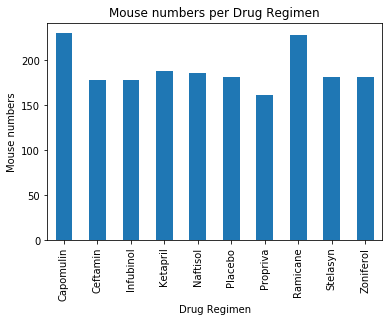

<Figure size 432x288 with 0 Axes>

In [77]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_by_regimen = combined_data.groupby(['Drug Regimen'])

mouse_number = mouse_by_regimen['Drug Regimen'].count()

# Chart our data, give it a title, and label the axes
bar_chart = mouse_number.plot(kind="bar", title="Mouse numbers per Drug Regimen")
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Mouse numbers")

plt.show()
plt.tight_layout()

In [185]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using Matplotlib. 
mouse_by_regimen = combined_data.groupby(['Drug Regimen'])

mouse_number = mouse_by_regimen['Drug Regimen'].count()

summary_statistics1 = pd.DataFrame({
    "Mouse Numbers": mouse_number
})
summary_statistics1

,Mouse Numbers
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


In [182]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using Matplotlib. 
# Convert "Drug Regimen" to a list
regimen_name = summary_statistics1.index.tolist()
regimen_name

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [183]:
# Convert number of mouses to a list
mouse_number = summary_statistics1["Mouse Numbers"].values.tolist()
mouse_number

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

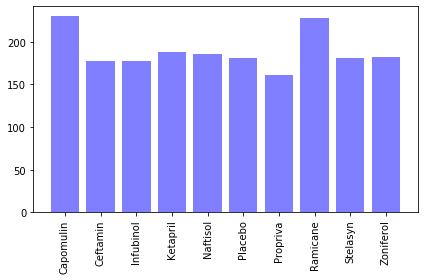

In [138]:
x_axis = np.arange(len(summary_statistics1))
drug_regimen = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, mouse_number, color='b', alpha=0.5, align="center")
plt.xticks(drug_regimen, regimen_name, rotation="vertical")
plt.tight_layout()

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_by_sex = removed_duplicates.groupby(['Sex'])

gender_count = mouse_by_sex['Sex'].count()

gender_count = pd.DataFrame({
    "Count": gender_count
})

gender_count

,Count
Sex,
Female,124
Male,125


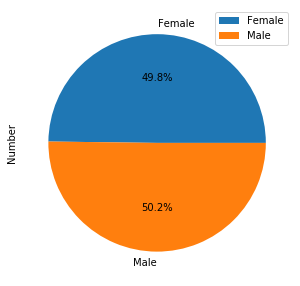

In [164]:
df = pd.DataFrame({'Number': [124, 125]},
                  index=['Female', 'Male'])
plot = df.plot.pie(y='Number', autopct="%1.1f%%", figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x1a33fb8790>,
 [Text(-1.1999761226567098, 0.007570010156471849, 'Female'),
  Text(1.0999781124353174, -0.006939175976765996, 'Male')],
 [Text(-0.6999860715497472, 0.004415839257941911, '49.8%'),
  Text(0.5999880613283548, -0.0037850050782359972, '50.2%')])

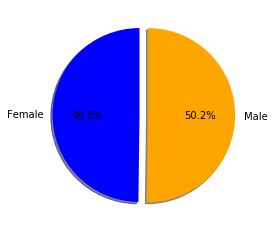

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

sizes = [124, 125]

colors = ["blue", "orange"]

explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [240]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
keep_last = combined_data.drop_duplicates(subset=['Mouse ID'], keep='last')
keep_last = keep_last.sort_values(["Drug Regimen"], ascending=True)
keep_last

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicated
299,b742,Capomulin,Male,7,21,45,38.939633,0,True
440,i557,Capomulin,Female,1,24,45,47.685963,1,True
390,r944,Capomulin,Male,12,25,45,41.581521,2,True
380,l509,Capomulin,Male,17,21,45,41.483008,3,True
370,s710,Capomulin,Female,1,23,45,40.728578,1,True
...,...,...,...,...,...,...,...,...,...
752,d133,Zoniferol,Male,5,30,0,45.000000,0,False
1250,n967,Zoniferol,Male,11,27,15,49.825004,1,True
755,d164,Zoniferol,Male,21,28,10,47.474645,1,True
1183,m331,Zoniferol,Female,19,26,15,52.110088,1,True


In [247]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
keep_last.drop(keep_last[keep_last['Drug Regimen'] == "Ketapril"].index, inplace=True)
keep_last.drop(keep_last[keep_last['Drug Regimen'] == "Naftisol"].index, inplace=True)
keep_last.drop(keep_last[keep_last['Drug Regimen'] == "Placebo"].index, inplace=True)
keep_last.drop(keep_last[keep_last['Drug Regimen'] == "Propriva"].index, inplace=True)
keep_last.drop(keep_last[keep_last['Drug Regimen'] == "Stelasyn"].index, inplace=True)
keep_last.drop(keep_last[keep_last['Drug Regimen'] == "Zoniferol"].index, inplace=True)
keep_last

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = keep_last['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    

The lower quartile of final tumor volume is: 37.187743802499995
The upper quartile of final tumor volume is: 59.930261755000004
The interquartile range of final tumor volume is: 22.74251795250001
The the median of final tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


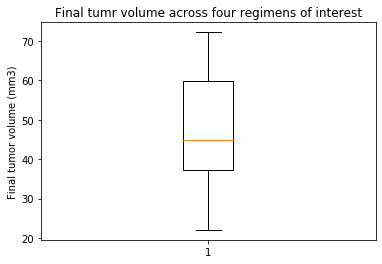

In [248]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume = keep_last['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Final tumr volume across four regimens of interest')
ax1.set_ylabel('Final tumor volume (mm3)')
ax1.boxplot(final_tumor_volume)
plt.show()

## Line and Scatter Plots

In [259]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin = capomulin.reset_index()
capomulin.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicated
0,10,s185,Capomulin,Female,3,17,0,45.000000,0,False
1,11,s185,Capomulin,Female,3,17,5,43.878496,0,True
2,12,s185,Capomulin,Female,3,17,10,37.614948,0,True
3,13,s185,Capomulin,Female,3,17,15,38.177232,0,True
4,14,s185,Capomulin,Female,3,17,20,36.866876,0,True


In [260]:
# shorten the data to mouse ID s185 only
s185 = capomulin.loc[capomulin["Mouse ID"] == "s185"]
s185 = s185.reset_index()
s185

,level_0,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,is_duplicated
0,0,10,s185,Capomulin,Female,3,17,0,45.000000,0,False
1,1,11,s185,Capomulin,Female,3,17,5,43.878496,0,True
2,2,12,s185,Capomulin,Female,3,17,10,37.614948,0,True
3,3,13,s185,Capomulin,Female,3,17,15,38.177232,0,True
4,4,14,s185,Capomulin,Female,3,17,20,36.866876,0,True
5,5,15,s185,Capomulin,Female,3,17,25,33.949940,0,True
6,6,16,s185,Capomulin,Female,3,17,30,32.959671,1,True
7,7,17,s185,Capomulin,Female,3,17,35,28.328531,1,True
8,8,18,s185,Capomulin,Female,3,17,40,25.472143,1,True
9,9,19,s185,Capomulin,Female,3,17,45,23.343598,1,True


In [261]:
# Create a list for the timepoint
timepoint = np.arange(0,50,5)
timepoint

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])

In [264]:
# Create a list for the tumor volume
mouse_s185 = s185.iloc[:, 8]
mouse_s185

0    45.000000
1    43.878496
2    37.614948
3    38.177232
4    36.866876
5    33.949940
6    32.959671
7    28.328531
8    25.472143
9    23.343598
Name: Tumor Volume (mm3), dtype: float64

Text(0, 0.5, 'Tumor Volume (mm3)')

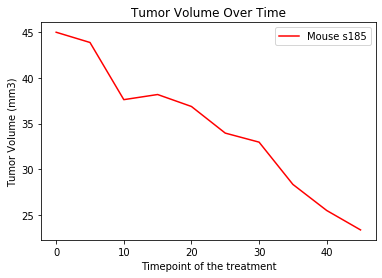

In [361]:
# Generate the line plot for this particular mouse ID
capomulin_mouse = plt.plot(timepoint, mouse_s185, color="red", label='Mouse s185')
plt.legend()
plt.title("Tumor Volume Over Time")
plt.xlabel("Timepoint of the treatment")
plt.ylabel("Tumor Volume (mm3)")

In [362]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_ID_group = capomulin.groupby(['Mouse ID', 'Weight (g)'])
average_tumor_volume = round(mouse_ID_group["Tumor Volume (mm3)"].mean(), 2)

mouse_ID_group = pd.DataFrame({
    "Average_Tumor_Volume_(mm3)": average_tumor_volume
})

mouse_ID_indexed = mouse_ID_group.reset_index()

mouse_ID_indexed1 = mouse_ID_indexed.rename(columns={"Weight (g)": "Weight_(g)"})
mouse_ID_indexed1

,Mouse ID,Weight_(g),Average_Tumor_Volume_(mm3)
0,b128,22,41.96
1,b742,21,40.08
2,f966,17,36.51
3,g288,19,41.99
4,g316,22,44.61
5,i557,24,44.81
6,i738,20,39.14
7,j119,23,44.47
8,j246,21,43.22
9,l509,21,44.43


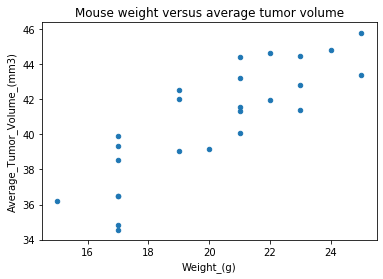

In [381]:
mouse_ID_indexed1.plot.scatter(x="Weight_(g)", y="Average_Tumor_Volume_(mm3)")
plt.title("Mouse weight versus average tumor volume")
plt.show()

## Correlation and Regression

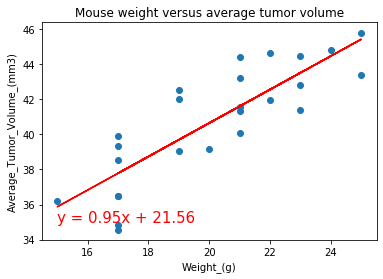

In [390]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

x_values = mouse_ID_indexed1['Weight_(g)']
y_values = mouse_ID_indexed1['Average_Tumor_Volume_(mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15, 35),fontsize=15,color="red")
plt.xlabel('Weight_(g)')
plt.ylabel('Average_Tumor_Volume_(mm3)')
plt.title("Mouse weight versus average tumor volume")
plt.show()

In [ ]:
# 3 observations from the analysis:
# 1. As the mouses weight (g) goes up, the average tumor volume (mm3) within the period increases, which indicates that the treatement will have less effect on the tumor volume if the weight is more.
# 2. The tumor volume goes down gradually by time with treatment.
# 3. No potential outliers in this data.